In [1]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        import zipfile

In [2]:
sourcefolder = '../../../../Downloads'
targetfolder = '../../Data/CloudSat/2C_Precip'
f = ['PRECIP-COLUMN', 'SNOW-PROFILE']
t = ['2016356112357_56655', 
      '2016357102821_56669',
      '2016358111138_56684',
      '2016359101602_56698',
      '2016360105918_56713',
      '2016361100342_56727']

https://www.science-emergence.com/Articles/How-to-read-a-MODIS-HDF-file-using-python-/

https://www.science-emergence.com/Articles/How-to-read-CloudSat-2B-GEOPROF-GRANULE-HDF4-file-using-python-and-pyhdf-/

In [3]:
### Import python libraries
from pyhdf.SD import SD, SDC
from pyhdf.HDF import *
from pyhdf.VS import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import shiftgrid


import pprint

In [4]:
for file in f:
    if file == 'PRECIP-COLUMN':
        processing = 'P2'
    elif file == 'SNOW-PROFILE':
        processing = 'P'
for day in t:
    file_path = targetfolder
    file_name = '/%s_CS_2C-%s_GRANULE_%s_R04_E06.hdf' %(day,file,processing)

In [5]:
file_path+file_name

'../../Data/CloudSat/2C_Precip/2016361100342_56727_CS_2C-SNOW-PROFILE_GRANULE_P_R04_E06.hdf'

In [6]:
### Read vdata

# Retrieve information about all data stored using HDF vdata model:
f = HDF(file_path+file_name, SDC.READ) 
vs = f.vstart()

data_info_list = vs.vdatainfo()

pprint.pprint( data_info_list )

vs.end() # terminate the vdata interface
f.close()

[('Profile_time', '', 7, 20679, 1, 0, 4, 1962, 0),
 ('UTC_start', '', 8, 1, 1, 0, 4, 1962, 0),
 ('TAI_start', '', 9, 1, 1, 0, 8, 1962, 0),
 ('Latitude', '', 10, 20679, 1, 0, 4, 1962, 0),
 ('Longitude', '', 11, 20679, 1, 0, 4, 1962, 0),
 ('DEM_elevation', '', 13, 20679, 1, 0, 2, 1962, 0),
 ('Vertical_binsize', '', 14, 1, 1, 0, 4, 1962, 0),
 ('Data_quality', '', 15, 20679, 1, 0, 1, 1962, 0),
 ('Data_status', '', 16, 20679, 1, 0, 1, 1962, 0),
 ('Data_targetID', '', 17, 20679, 1, 0, 1, 1962, 0),
 ('snow_retrieval_status', '', 18, 20679, 1, 0, 1, 1962, 0),
 ('norm_chi_square', '', 19, 20679, 1, 0, 4, 1962, 0),
 ('snowfall_rate_sfc', '', 32, 20679, 1, 0, 4, 1962, 0),
 ('snowfall_rate_sfc_uncert', '', 33, 20679, 1, 0, 4, 1962, 0),
 ('snowfall_rate_sfc_confidence', '', 34, 20679, 1, 0, 1, 1962, 0),
 ('nray:2C-SNOW-PROFILE', 'DimVal0.1', 203, 1, 1, 0, 4, 1962, 0),
 ('nbin:2C-SNOW-PROFILE', 'DimVal0.1', 205, 1, 1, 0, 4, 1962, 0)]


In [8]:
### Read latitudes and longitudes, profile time
f = HDF(file_path+file_name, SDC.READ) 
vs = f.vstart()

vdata_lat = vs.attach('Latitude')
vdata_long = vs.attach('Longitude')

vdata_profile_time = vs.attach('Profile_time')



lat = vdata_lat[:]
long = vdata_long[:]

profile_time = vdata_profile_time[:]



print('Nb pixels: ', len(lat))
print('Lat min, Lat max: ',min(lat),max(lat))

for i in range(15): # sample
    print(lat[i])

# to get vdata latitude info
print( vdata_lat.attrinfo() )        
        
vdata_lat.detach() # "close" the vdata
vdata_long.detach() # "close" the vdata
vs.end() # terminate the vdata interface
f.close()




Nb pixels:  20679
Lat min, Lat max:  [-81.82369232177734] [81.82267761230469]
[-69.22298431396484]
[-69.23181915283203]
[-69.24064636230469]
[-69.24948120117188]
[-69.25831604003906]
[-69.26714324951172]
[-69.27597045898438]
[-69.28479766845703]
[-69.29362487792969]
[-69.30245208740234]
[-69.311279296875]
[-69.32010650634766]
[-69.32893371582031]
[-69.33775329589844]
[-69.3465805053711]
{}


In [9]:
np.array(lat).shape

(20679, 1)

In [10]:
np.array(long).shape

(20679, 1)

In [11]:
# Read SDS data
file = SD(file_path+file_name, SDC.READ)
pprint.pprint( file.info() )  # number of sds and metadata


(9, 2)


In [12]:
# Get and print all sds names
datasets_dic = file.datasets()

sds_dic = {}
for key, value in datasets_dic.items():
    sds_dic[value[3]] = key

pprint.pprint( sds_dic )

{0: 'Height',
 1: 'snowfall_rate',
 2: 'snowfall_rate_uncert',
 3: 'log_N0',
 4: 'log_N0_uncert',
 5: 'log_lambda',
 6: 'log_lambda_uncert',
 7: 'snow_water_content',
 8: 'snow_water_content_uncert'}


In [13]:
# Read snow water content
SWC_obj = file.select('snow_water_content') # select SWC
SWC = SWC_obj.get()
SWC_info = SWC_obj.info()

print( SWC_info )
pprint.pprint( SWC_obj.attributes() )

print( SWC.shape )

('snow_water_content', 2, [20679, 125], 5, 1)
{'_FillValue': 0.0}
(20679, 125)


In [14]:
# Read snowfall rate 
snowfall_rate_obj = file.select('snowfall_rate') # select snowfall_rate
snowfall_rate = snowfall_rate_obj.get()
snowfall_rate_info = snowfall_rate_obj.info()

print( snowfall_rate_info )
pprint.pprint( snowfall_rate_obj.attributes() )

print( snowfall_rate.shape )

('snowfall_rate', 2, [20679, 125], 5, 1)
{'_FillValue': 0.0}
(20679, 125)


In [15]:
# Read height
height_obj = file.select('Height')
height = height_obj.get()
height_info = height_obj.info()

print( height_info )
pprint.pprint( height_obj.attributes() )

print( height.shape )

('Height', 2, [20679, 125], 22, 1)
{'_FillValue': -9999}
(20679, 125)


In [16]:
# create 2d profile time array
profile_time_arr = np.repeat(profile_time, height.shape[1], axis = 0)
profile_time_arr = np.reshape(profile_time_arr, (-1, height.shape[1]))

In [17]:
x1, x2 = np.where(SWC[:,:] <0.01)
SWC[x1[:],x2[:]] = np.nan

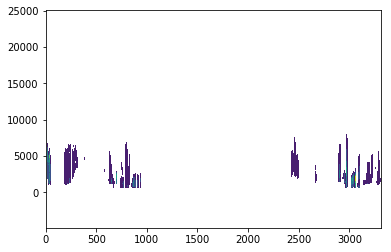

In [18]:
plt.contourf(profile_time_arr,height,SWC)

In [19]:
lats, lons = np.meshgrid(lat, long)

In [20]:
stn_lat      = 59.81
stn_lon      = 7.21

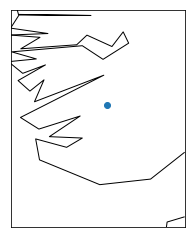

In [21]:
# Create a basemap to show the data
#m = Basemap(llcrnrlon=np.min(long),llcrnrlat=np.min(lat),urcrnrlon=np.max(long),urcrnrlat=np.max(lat),)
m = Basemap(llcrnrlon=5., urcrnrlon=9., llcrnrlat=57.,urcrnrlat=62)
m.drawcoastlines()
#m.pcolormesh(lons, lats, data, alpha=.3)
m.scatter(stn_lon, stn_lat)

In [22]:
# Now find the absolute value of the difference between the  station's lat/lon with every point in the grid. 
# This tells us how close a point is to the particular latitude and longitude.
abslat = np.abs(lats-stn_lat)
abslon= np.abs(lons-stn_lon)

In [23]:
c = np.maximum(abslon, abslat)

In [24]:
x, y = np.where(c == np.min(c))
grid_lat = lats[x[0], y[0]]

In [25]:
grid_lon = lons[x[0], y[0]]

In [26]:
x

array([19141])

Value of 59.810813903808594 7.21480131149292
59.810813903808594 7.21480131149292 is the nearest grid to 59.81 7.21


<bound method Basemap.pcolormesh of <mpl_toolkits.basemap.Basemap object at 0x7f42128e0978>>

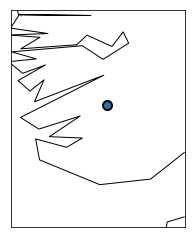

In [27]:
print( "Value of %s %s" % (grid_lat, grid_lon))
print( "%s %s is the nearest grid to %s %s" %(grid_lat, grid_lon, stn_lat, stn_lon))

m.drawcoastlines()
#m.pcolormesh(lons, lats, c)
m.scatter(grid_lon, grid_lat, s=100, c='k')
#plt.text(grid_lon+.5, grid_lat+.5, #grid_data, 
      #   color='w')
m.scatter(stn_lon, stn_lat)
m.pcolormesh

In [28]:
lower_lat = stn_lat -2.
upper_lat = stn_lat +2.

left_lon = stn_lon -2.
right_lon = stn_lon +2.


In [29]:
abslat_lower = np.abs(lats-lower_lat)

In [31]:
abslat_upper = np.abs(lats-upper_lat)

MemoryError: 

In [ ]:
abslon_left = np.abs(lons-left_lon)

In [ ]:
abslon_right = np.abs(lons-right_lon)

In [ ]:
c_llcrn =  np.maximum(abslon_left, abslat_lower)
c_lrcrn =  np.maximum(abslon_right, abslat_lower)

c


In [ ]:
x_llcrn, y_llcrn = np.where(c_llcrn == np.min(c_llcrn))

In [ ]:
x_llcrn

In [ ]:
y_llcrn

In [ ]:
grid_lat_llcrn = lats[x_llcrn[0], y_llcrn[0]]

In [ ]:
grid_lon_llcrn = lons[x_llcrn[0], y_llcrn[0]]

In [ ]:
print( "Value of %s %s" % (grid_lat_llcrn, grid_lon_llcrn))
#print( "%s %s is the nearest grid to %s %s" %(grid_lat, grid_lon, stn_lat, stn_lon))

In [ ]:
x, y = find_station_yx(np.array(lat), np.array(long), stn_lat, stn_lon)

In [ ]:
def find_station_yx(latitude, longitude, stn_lat, stn_lon):
# find the absolute value of the difference between the  station's lat/lon with every point in the grid. 
# This tells us how close a point is to the particular latitude and longitude.
    abslat = np.abs(latitude[:,:]-stn_lat)
    abslon = np.abs(longitude[:,:]-stn_lon)

# Now we need to combine these two results. We will use numpy.maximum, which takes two arrays and finds the local 
# maximum.
    c = np.maximum(abslon, abslat)

# If you don't like flattened arrays, you can also get the row/column index like this
    y, x = np.where(c == np.min(c))
    return(x,y);